In [1]:
pwd

'C:\\Users\\Maks\\kaggle-competitions\\Humpback-Whale-Identification\\code\\notebooks'

In [2]:
train_csv = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/input/train.csv'
sample_csv = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/input/sample_submission.csv'

In [3]:
from pandas import read_csv

tagged = dict([(picture, whale) for (_, picture, whale) in read_csv(train_csv).to_records()])

submit = [picture for (_, picture, _) in read_csv(sample_csv).to_records()]

join = list(tagged.keys()) + submit

len(tagged), len(submit), len(join), list(tagged.items())[:5], submit[:5]

(25361,
 7960,
 33321,
 [('0000e88ab.jpg', 'w_f48451c'),
  ('0001f9222.jpg', 'w_c3d896a'),
  ('00029d126.jpg', 'w_20df2c5'),
  ('00050a15a.jpg', 'new_whale'),
  ('0005c1ef8.jpg', 'new_whale')],
 ['00028a005.jpg',
  '000dcf7d8.jpg',
  '000e7c7df.jpg',
  '0019c34f4.jpg',
  '001a4d292.jpg'])

In [4]:
# join = join[:10]
join

['0000e88ab.jpg',
 '0001f9222.jpg',
 '00029d126.jpg',
 '00050a15a.jpg',
 '0005c1ef8.jpg',
 '0006e997e.jpg',
 '000a6daec.jpg',
 '000f0f2bf.jpg',
 '0016b897a.jpg',
 '001c1ac5f.jpg',
 '001cae55b.jpg',
 '001d7450c.jpg',
 '00200e115.jpg',
 '00245a598.jpg',
 '002b4615d.jpg',
 '002f99f01.jpg',
 '00355ff28.jpg',
 '00357e37a.jpg',
 '003795857.jpg',
 '0041880bf.jpg',
 '0043da555.jpg',
 '00442c882.jpg',
 '00464ff65.jpg',
 '004775679.jpg',
 '004ae9e26.jpg',
 '004c0f43b.jpg',
 '004e8ad5b.jpg',
 '004f87702.jpg',
 '0050ef29d.jpg',
 '00514c876.jpg',
 '0052ce2f5.jpg',
 '00537ec91.jpg',
 '00570db6b.jpg',
 '005ce3100.jpg',
 '00600ce17.jpg',
 '006017ddf.jpg',
 '0060f764a.jpg',
 '006500b3d.jpg',
 '006506edf.jpg',
 '0067b3a20.jpg',
 '006bdc6ff.jpg',
 '00713060e.jpg',
 '007218187.jpg',
 '0073118da.jpg',
 '007a7846f.jpg',
 '007b62e05.jpg',
 '007f3eb46.jpg',
 '008124524.jpg',
 '0084fe40b.jpg',
 '0085064af.jpg',
 '0085a6bd0.jpg',
 '00869b59e.jpg',
 '008bf89fc.jpg',
 '008ebc50d.jpg',
 '00910010d.jpg',
 '00917baa

In [5]:
from os.path import isfile
from PIL import Image
from tqdm import tqdm_notebook

train_dir2 = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/input/train/'
test_dir2 = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/input/test/'

def expand_path(image):
    train_image_path = train_dir2 + image
    if isfile(train_image_path):
        return train_image_path
    
    test_image_path = test_dir2 + image
    if isfile(test_image_path):
        return test_image_path
    
p2s = {}
for image in tqdm_notebook(join):
    size = Image.open(expand_path(image)).size
    p2s[image] = size
    
len(p2s), list(p2s.items())[:5]    

(33321,
 [('0000e88ab.jpg', (1050, 700)),
  ('0001f9222.jpg', (758, 325)),
  ('00029d126.jpg', (1050, 497)),
  ('00050a15a.jpg', (1050, 525)),
  ('0005c1ef8.jpg', (1050, 525))])

In [90]:
len(tagged)

25361

In [103]:
w2imgs = {}
for img, whale in tagged.items():
    if whale not in w2imgs:
        w2imgs[whale] = []
    if img not in w2imgs[whale]:
        w2imgs[whale].append(img)
        
train = []

for whale, imgs in w2imgs.items():
    if len(imgs) > 1 and whale != 'new_whale':
        train += imgs
random.shuffle(train)
train_set = set(train)

w2ts = {}
for whale, imgs in w2imgs.items():
    for img in imgs:
        if img in train_set:
            if whale not in w2ts:
                w2ts[whale] = []
            if img not in w2ts[whale]:
                w2ts[whale].append(img)

for w, ts in w2ts.items():
    w2ts[w] = np.array(ts)
    
t2i = {}
for i, t in enumerate(train):
    t2i[t] = i
    
len(train), len(w2ts)

(13624, 2931)

In [100]:
len(w2imgs)

5005

In [101]:
len(w2imgs['new_whale'])

9664

In [9]:
import pickle
import numpy as np
from imagehash import phash
from math import sqrt

train_dir = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/input/'

def match(hash_1, hash_2):
    for image_1 in hash_to_images[hash_1]:
        for image_2 in hash_to_images[hash_2]:
            I_1 = Image.open(expand_path(image_1))
            I_2 = Image.open(expand_path(image_2))
            if I_1.mode != I_2.mode or I_1.size != I_2.size:
                return False
            A_1 = np.array(I_1)
            A_1 = A_1 - A_1.mean()
            A_1 = A_1 / sqrt((A_1**2).mean())
            A_2 = np.array(I_2)
            A_2 = A_2 - A_2.mean()
            A_2 = A_2 / sqrt((A_2**2).mean())
            A = ((A_1 - A_2)**2).mean()
            if A > 0.1:
                return False
    return True

image_to_hash_file = train_dir + 'image_to_hash.pickle3'
if isfile(image_to_hash_file):
    with open(image_to_hash_file, 'rb') as f:
        p2h = pickle.load(f)
else:
    p2h = {}
    for image in tqdm_notebook(join):
        I = Image.open(expand_path(image))
        hash_ = phash(I)
        p2h[image] = hash_
        
    h2ps = {}
    for image, hash_ in p2h.items():
        if hash_ not in h2ps:
            h2ps[hash_] = []
        if image not in h2ps[hash_]:
            h2ps[hash_].append(image)
     
    hashes = list(hash_to_images.keys())
    
    h2h = {}
    for i, hash_1 in enumerate(tqdm_notebook(hashes)):
        for hash_2 in hashes[:i]:
            if hash_1 - hash_2 <= 6 and match(hash_1, hash_2):
                s_1 = str(hash_1)
                s_2 = str(hash_2)
                if s_1 < s_2:
                    s_1, s_2 = s_2, s_1
                h2h[s_1] = s_2
    
    for image, hash_ in p2h.items():
        hash_ = str(hash_)
        if hash_ in h2h:
            hash_ = h2h[hash_]
        p2h[image] = hash_
            
            
    with open(image_to_hash_file, 'wb') as f:
        pickle.dump(p2h, f)
            
len(p2h), list(p2h.items())[:5]
    

(33321,
 [('0000e88ab.jpg', 'd26698c3271c757c'),
  ('0001f9222.jpg', 'ba8cc231ad489b77'),
  ('00029d126.jpg', 'bbcad234a52d0f0b'),
  ('00050a15a.jpg', 'c09ae7dc09f33a29'),
  ('0005c1ef8.jpg', 'd02f65ba9f74a08a')])

In [10]:
h2ps = {}
for image, hash_ in p2h.items():
    if hash_ not in h2ps:
        h2ps[hash_] = []
    if image not in h2ps[hash_]:
        h2ps[hash_].append(image)

In [83]:
len(p2h), len(h2ps)

(33321, 33317)

Images: ['01f66ca26.jpg', 'd37179fd1.jpg']
Images: ['579886448.jpg', 'f50529c53.jpg']
Images: ['60a3f2422.jpg', '7f7a63b8a.jpg']
Images: ['b95d73a55.jpg', 'fb3879dc7.jpg']


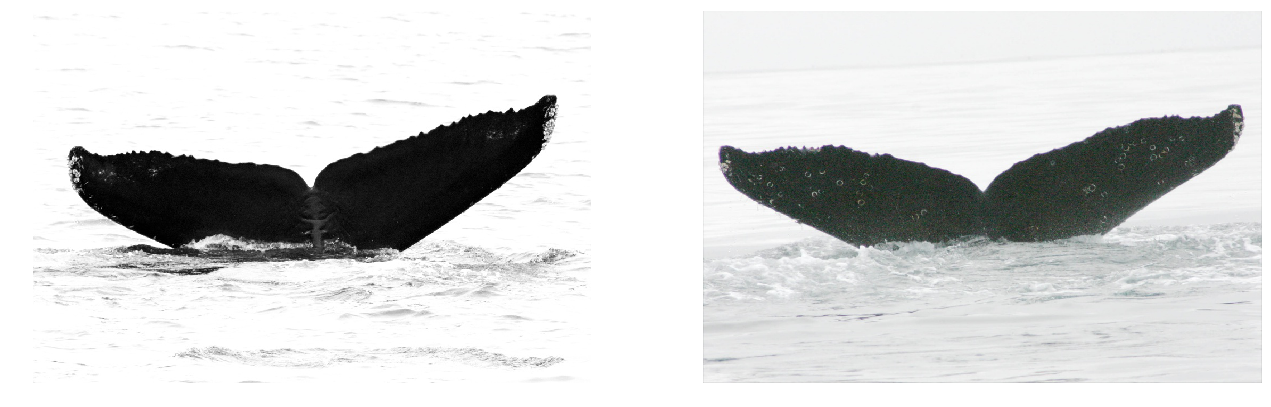

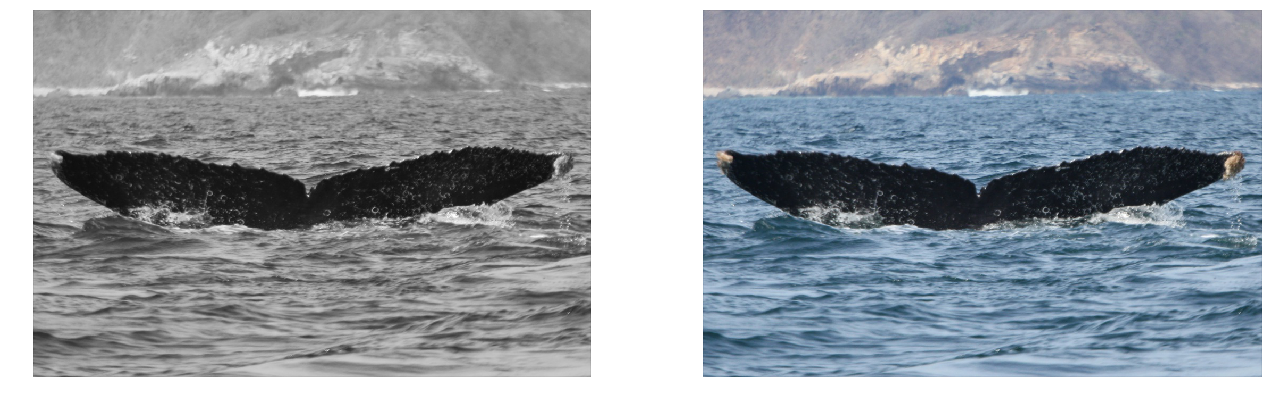

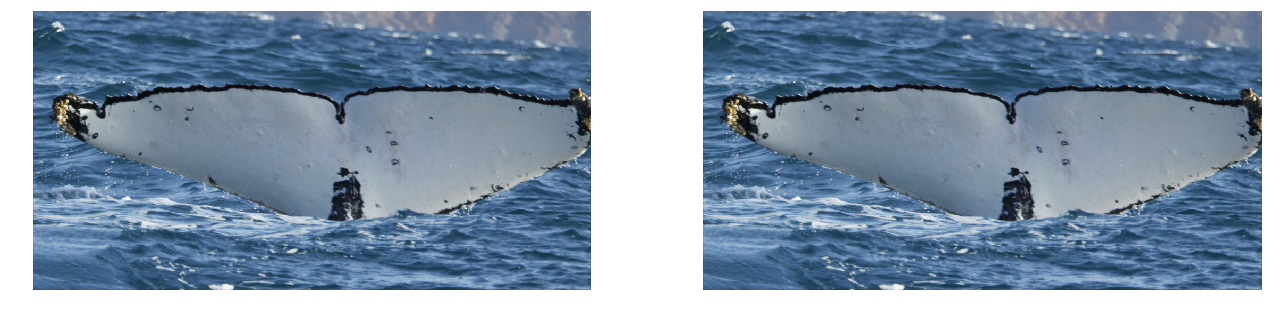

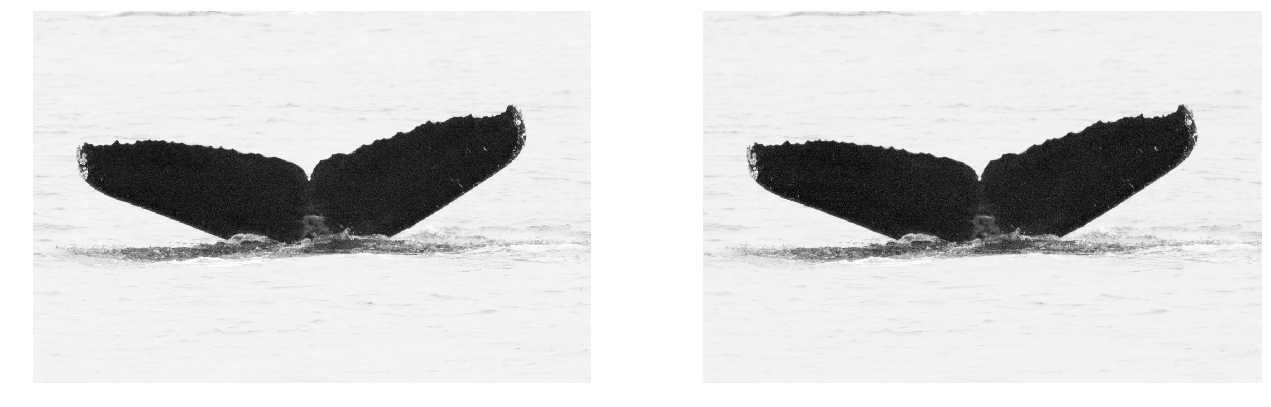

In [89]:
i = 0
for h, ps in h2ps.items():
    if len(ps) >= 2:
        print('Images:', ps)
        imgs = [Image.open(expand_path(p)) for p in ps]
        show_whales(imgs, per_row=len(ps))

In [12]:
I1 = Image.open(expand_path('0000e88ab.jpg'))
I2 = Image.open(expand_path('0001f9222.jpg'))
h1 = phash(I1)
h2 = phash(I2)
print(h1 - h2)
print(I1.mode)

32
RGB


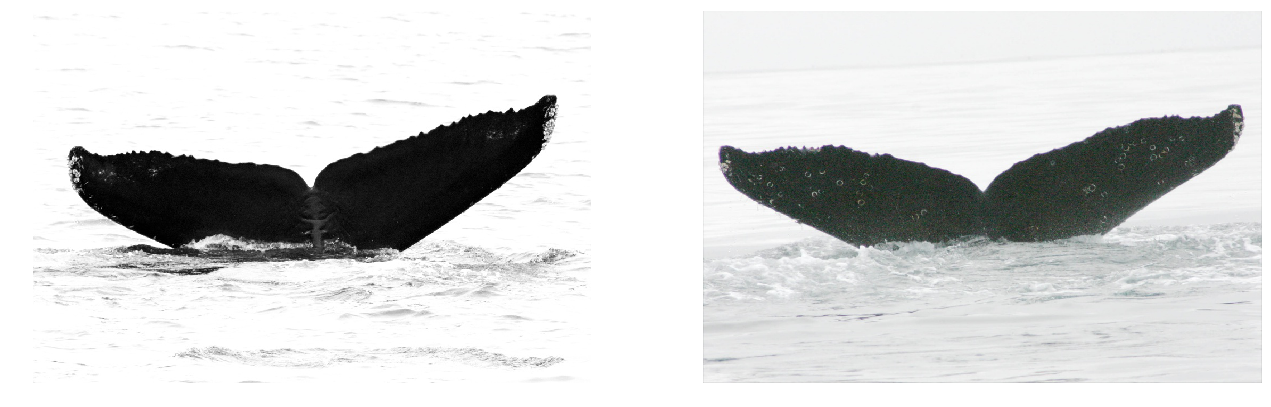

In [78]:
imgs = h2ps['eecad0b52d4ac2f0']
Is = [Image.open(expand_path(img)) for img in imgs]
show_whales(Is)

In [ ]:
len(h2pc), list(h2ps.items())[:5] 

In [15]:
import matplotlib.pyplot as plt

def show_whales(images, per_row = 2):
    n = len(images)
    rows = (n + per_row - 1) // per_row
    cols = min(per_row, n)
    fig, axes = plt.subplots(rows, cols, figsize=(23 // per_row * cols, 24 // per_row * rows))
    for ax in axes.flatten():
        ax.axis('off')
        for i, (image, ax) in enumerate(zip(images, axes.flatten())):
            ax.imshow(image.convert('RGB'))
    
# for hash_, images in hash_to_images.items():
#     if len(images) > 2:
#         print('Images:', images)
#         Is = [Image.open(expand_path(image)) for image in images]
#         show_whales(Is, per_row = len(images))
#         break

In [16]:
plt.imshow(I)

NameError: name 'I' is not defined

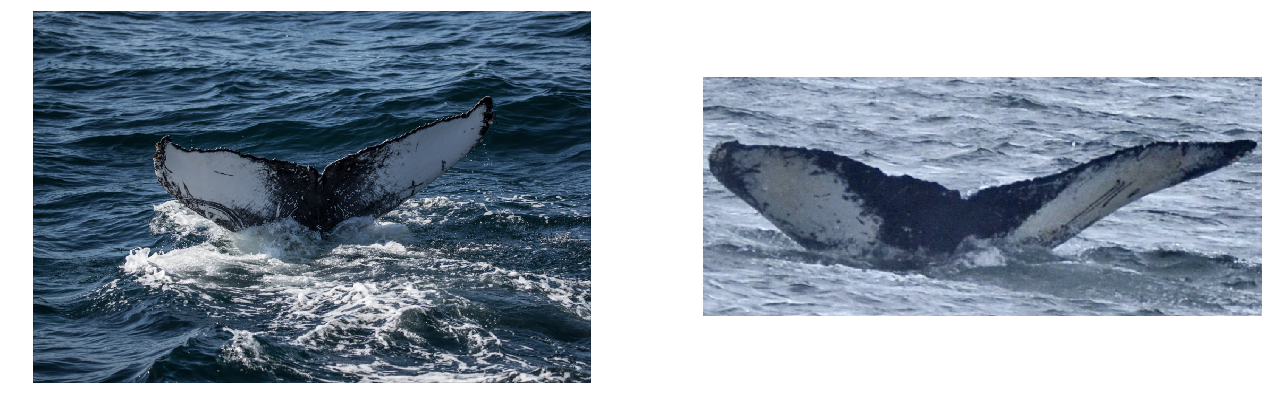

In [17]:
I1 = Image.open(expand_path(join[0]))
I2 = Image.open(expand_path(join[1]))
show_whales([I1, I2])

In [18]:
def prefer(images):
    if len(images) == 1:
        return images[0]
    best_image = images[0]
    best_size = p2s[best_image]
    for i in range(1, len(images)):
        image = images[i]
        size = p2s[image]
        if size[0] * size[1] > best_size[1]:
            best_image = image
            best_size = size
    return best_image

h2p = {}
for hash_, images in h2ps.items():
    h2p[hash_] = prefer(images)

len(h2p), list(h2p.items())[:5]

(33317,
 [('d26698c3271c757c', '0000e88ab.jpg'),
  ('ba8cc231ad489b77', '0001f9222.jpg'),
  ('bbcad234a52d0f0b', '00029d126.jpg'),
  ('c09ae7dc09f33a29', '00050a15a.jpg'),
  ('d02f65ba9f74a08a', '0005c1ef8.jpg')])

In [67]:
import sys
import keras
import random
from keras import backend as K
from keras.preprocessing.image import img_to_array, array_to_img
from scipy.ndimage import affine_transform
import cv2
from scipy.misc import imresize
from tensorflow.keras.backend import resize_images

def read_raw_image(image):
    I = Image.open(expand_path(image)) # read image in grayscale 
    I = I.convert('L')
    I = I.resize((384,384))
    I = img_to_array(I)
    I -= np.mean(I, keepdims=True)
    I /= np.std(I, keepdims=True) + K.epsilon()
    return I

# img = read_raw_image(list(tagged.keys())[0])
# print(img.shape)
# print(array_to_img(img))
# imgs = [ array_to_img(img), array_to_img(img) ]
# show_whales(imgs)

# list(tagged.keys())[:5]

In [20]:
from keras import regularizers
from keras.optimizers import Adam
from keras.engine.topology import Input
from keras.layers import Activation, Add, BatchNormalization, Concatenate, Conv2D, Dense, Flatten, GlobalMaxPooling2D, Lambda, MaxPooling2D, Reshape
from keras.models import Model

img_shape = (384, 384, 1)

def sub_block(x, filter, **kwargs):
    x = BatchNormalization()(x)
    y = x
    y = Conv2D(filter, (1, 1), activation='relu', **kwargs)(y)
    y = BatchNormalization()(y)
    y = Conv2D(filter, (3, 3), activation='relu', **kwargs)(y)
    y = BatchNormalization()(y)
    y = Conv2D(K.int_shape(x)[-1], (1, 1), **kwargs)(y)
    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def build_model(lr, l2, activation='sigmoid'):
    
    ####################
    ### BRANCH MODEL ###
    ####################
    
    regularizer = regularizers.l2(l2)
    optimizer = Adam(lr=lr)
    kwargs = {
        'padding': 'same',
        'kernel_regularizer': regularizer
    }
    
    inp = Input(shape=img_shape) # (384, 384, 1)
    x = Conv2D(64, (9, 9), strides=2, activation='relu', **kwargs)(inp)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x) # (96, 96, 64)
    
    for _ in range(2):
        x = BatchNormalization()(x)
        x = Conv2D(64, (3, 3), activation='relu', **kwargs)(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2))(x) # (48 x 48 x 64)
    x = BatchNormalization()(x)
    x = Conv2D(128, (1, 1), activation='relu', **kwargs)(x) # (48, 48, 128)
    
    for _ in range(4):
        x = sub_block(x, 64, **kwargs)
        
    x = MaxPooling2D((2, 2), strides=(2, 2))(x) # (24, 24, 128)
    x = BatchNormalization()(x)
    x = Conv2D(256, (1, 1), activation='relu', **kwargs)(x) # (24, 24, 256)
    
    for _ in range(4):
        x = sub_block(x, 64, **kwargs)
        
    x = MaxPooling2D((2, 2), strides=(2, 2))(x) # (12, 12, 256)
    x = BatchNormalization()(x)
    x = Conv2D(384, (1, 1), activation='relu', **kwargs)(x) # (12, 12, 384)
    
    for _ in range(4):
        x = sub_block(x, 96, **kwargs)
        
    x = MaxPooling2D((2, 2), strides=(2, 2))(x) # (6, 6, 384)
    x = BatchNormalization()(x)
    x = Conv2D(512, (1, 1), activation='relu', **kwargs)(x) # (6, 6, 512)
    
    for _ in range(4):
        x = sub_block(x, 128, **kwargs)
        
    x = GlobalMaxPooling2D()(x) # (512)
    
    branch_model = Model(inp, x)
        
    
    ##################
    ### HEAD MODEL ###
    ##################
    
    mid = 32
    xa_inp = Input(shape=branch_model.output_shape[1:])
    xb_inp = Input(shape=branch_model.output_shape[1:])
    
    x1 = Lambda(lambda x: x[0] * x[1])([xa_inp, xb_inp])
    x2 = Lambda(lambda x: x[0] + x[1])([xa_inp, xb_inp])
    x3 = Lambda(lambda x: K.abs(x[0] - x[1]))([xa_inp, xb_inp])
    x4 = Lambda(lambda x: K.square(x))(x3)
    
    x = Concatenate()([x1, x2, x3, x4])
    x = Reshape((4, branch_model.output_shape[1], 1), name='reshape1')(x)
    
    x = Conv2D(mid, (4, 1), activation='relu', padding='valid')(x)
    x = Reshape((branch_model.output_shape[1], mid, 1))(x)
    x = Conv2D(1, (1, mid), activation='linear', padding='valid')(x)
    x = Flatten(name='flatten')(x)
    
    x = Dense(1, use_bias=True, activation=activation, name='weighted-average')(x)
    
    head_model = Model([xa_inp, xb_inp], x, name='head')
    
    ##############################
    ### SIAMESE NEURAL NETWORK ###
    ##############################
    
    img_a = Input(shape=img_shape)
    img_b = Input(shape=img_shape)
    xa = branch_model(img_a)
    xb = branch_model(img_b)
    x = head_model([xa, xb])
    model = Model([img_a, img_b], x)
    
    model.compile(optimizer, loss='binary_crossentropy', 
                  metrics=['binary_crossentropy', 'acc'])
    
    return model, branch_model, head_model

model, branch_model, head_model = build_model(64e05, 0)
head_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 512)          0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512)          0           input_2[0][0]                    
          

In [21]:
branch_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 384, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 192, 192, 64) 5248        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 96, 96, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 96, 96, 64)   256         max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_15 (BatchNo (None, 48, 48, 64)   256         conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 48, 48, 128)  8320        batch_normalization_15[0][0]     
__________________________________________________________________________________________________
add_4 (Add)                     (None, 48, 48, 128)  0           batch_normalization_13[0][0]     
                                                                 conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 48, 48, 128)  0           add_4[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 24, 24, 128)  0           activation_4[0][0]               
__________

__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 12, 12, 256)  0           activation_8[0][0]               
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 12, 12, 256)  1024        max_pooling2d_4[0][0]            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 12, 12, 384)  98688       batch_normalization_29[0][0]     
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 12, 12, 384)  1536        conv2d_30[0][0]                  
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 12, 12, 96)   36960       batch_normalization_30[0][0]     
__________

__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 6, 6, 128)    65664       batch_normalization_43[0][0]     
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 6, 6, 128)    512         conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 6, 6, 128)    147584      batch_normalization_44[0][0]     
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 6, 6, 128)    512         conv2d_45[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 6, 6, 512)    66048       batch_normalization_45[0][0]     
__________

In [22]:
h2ws = {}
new_whale = 'new_whale'
for image, whale in tagged.items():
    if whale != new_whale:
        h = p2h[image]
        if h not in h2ws:
            h2ws[h] = []
        if whale not in h2ws[h]:
            h2ws[h].append(whale)

for h, whales in h2ws.items():
    if len(whales) > 1:
        h2ws[h] = sorted(whales)

len(h2ws)

15696

In [23]:
w2hs = {}
for h, whales in h2ws.items():
    if len(whales) == 1:
        whale = whales[0]
        if whale not in w2hs:
            w2hs[whale] = []
        if h not in w2hs[whale]:
            w2hs[whale].append(h)

for whale, hashes in w2hs.items():
    if len(hashes) > 1:
        w2hs[whale] = sorted(hashes)

len(w2hs)            

5004

In [25]:
train = []
for hashes in w2hs.values():
    if len(hashes) > 1:
        train += hashes

random.shuffle(train)
train_set = set(train)

w2ts = {}

for whale, hashes in w2hs.items():
    for h in hashes:
        if h in train_set:
            if whale not in w2ts: 
                w2ts[whale] = []
            if h not in w2ts[whale]:
                w2ts[whale].append(h)
                
for w, ts in w2ts.items():
    w2ts[w] = np.array(ts)
    
t2i = {}
for i, t in enumerate(train): 
    t2i[t] = i
    
len(train), len(w2ts)

(13623, 2931)

In [55]:
train[:5]

['fa8ea06cdb791a06',
 'bec394a1e03ccb1e',
 'ca93a0689fea5e13',
 'ea1e8761f8384d9a',
 'becbc0b03c4bd2b4']

In [26]:
from lap import lapjv 

In [68]:
from keras.utils import Sequence
from scipy.optimize import linear_sum_assignment

class TrainingData(Sequence):
    def __init__(self, score, steps=1000, batch_size=32):
        """
        @param score: cost matrix for the picture matching
        @param steps: number of epoch we are planning with this score matrix
        """
        super(TrainingData, self).__init__()
        self.score = -score
        self.steps = steps
        self.batch_size = batch_size
        img_shape = (384,384,1)
        for ts in w2ts.values():
            idxs = [t2i[t] for t in ts]
            for i in idxs:
                for j in idxs:
                    self.score[i, j] = 10000.0
        self.on_epoch_end()
        
    def __getitem__(self, index):
        img_shape = (384, 384, 1)
        start = self.batch_size * index
        end = min(start + self.batch_size, len(self.match) + len(self.unmatch))
        size = end - start
        assert size > 0
        a = np.zeros((size, ) + img_shape, dtype=K.floatx())
        b = np.zeros((size, ) + img_shape, dtype=K.floatx())
        c = np.zeros((size,1), dtype=K.floatx())
        j = start // 2
        
        for i in range(0, size, 2):
            a[i,:,:,:] = read_raw_image(h2p[self.match[j][0]])
            b[i,:,:,:] = read_raw_image(h2p[self.match[j][1]])
            c[i,0] = 1
            a[i+1,:,:,:] = read_raw_image(h2p[self.unmatch[j][0]])
            b[i+1,:,:,:] = read_raw_image(h2p[self.unmatch[j][1]])
            c[i+1,0] = 0
            j += 1
        return [a,b], c
    
    def on_epoch_end(self):
        if self.steps <= 0:
            return 
        
        self.steps -= 1
        self.match = []
        self.unmatch = []
        
        _,_,x = lapjv(self.score)
        
        y = np.arange(len(x), dtype=np.int32)
        
        for ts in w2ts.values():
            d = ts.copy()
            while True:
                random.shuffle(d)
                if not np.any(ts == d):
                    break
            for ab in zip(ts, d):
                self.match.append(ab)
                
        for i, j in zip(x, y):
            if i == j:
                print(self.score)
                print(x)
                print(y)
                print(i, j)
            assert i != j
            self.unmatch.append((train[i], train[j]))
            
        self.score[x, y] = 10000.0
        self.score[y, x] = 10000.0
        random.shuffle(self.match)
        random.shuffle(self.unmatch)
        
        assert len(self.match) == len(train) and len(self.unmatch) == len(train)
        
    def __len__(self):
        return (len(self.match) + len(self.umatch) + self.batch_size - 1) // self.batch_size
            

In [60]:
# Test on batch of 32 with random costs
score = np.random.random_sample(size=(len(train), len(train)))
data = TrainingData(score)
(a, b), c = data[0]
a.shape, b.shape, c.shape

match:  dd9665e593498c49
Read raw image:  6982920d6.jpg
Read raw image:  689f67e15.jpg
Read raw image:  9a0753034.jpg
Read raw image:  8e001429d.jpg
match:  b38dccb331a41dcc
Read raw image:  754455b0f.jpg
Read raw image:  523200042.jpg
Read raw image:  44d90f1e6.jpg
Read raw image:  19b75a357.jpg
match:  fad280e0b6659c4f
Read raw image:  2f58ccdf5.jpg
Read raw image:  c317bd277.jpg
Read raw image:  57703d4ea.jpg
Read raw image:  2886ffed5.jpg
match:  f8c785385a87f438
Read raw image:  73b6d06ab.jpg
Read raw image:  1ecfce864.jpg
Read raw image:  82788a404.jpg
Read raw image:  f6b85aa1e.jpg
match:  bd43c2352f887ac3
Read raw image:  29e9b7ed6.jpg
Read raw image:  451eb931a.jpg
Read raw image:  0e5808245.jpg
Read raw image:  1965df4d1.jpg
match:  b7cc93f32c1bc214
Read raw image:  bcba07091.jpg
Read raw image:  9b785420f.jpg
Read raw image:  0583589ed.jpg
Read raw image:  e9280c18c.jpg
match:  cbd9b461089fe42d
Read raw image:  bdbde05e7.jpg
Read raw image:  49c79d784.jpg
Read raw image:  8e

((32, 384, 384, 1), (32, 384, 384, 1), (32, 1))

In [ ]:
h2p

In [32]:
s = (384, 384, 1)
s[:-1]

(384, 384)

In [33]:
x = (1, 2, 3)
y = np.zeros((5, ) + x)
y.shape

(5, 1, 2, 3)

In [34]:
y[0, :, :, :] = 1

In [35]:
y

array([[[[1., 1., 1.],
         [1., 1., 1.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]]]])

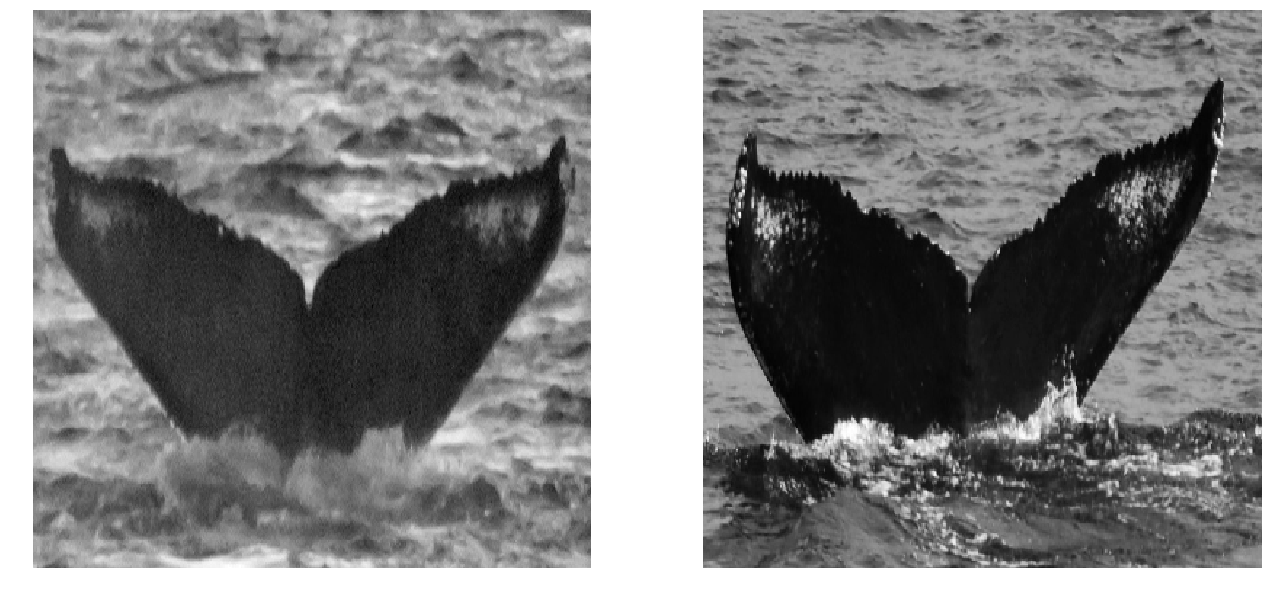

In [36]:
# First pair is for matching whales
imgs = [array_to_img(a[0]), array_to_img(b[0])]
show_whales(imgs)

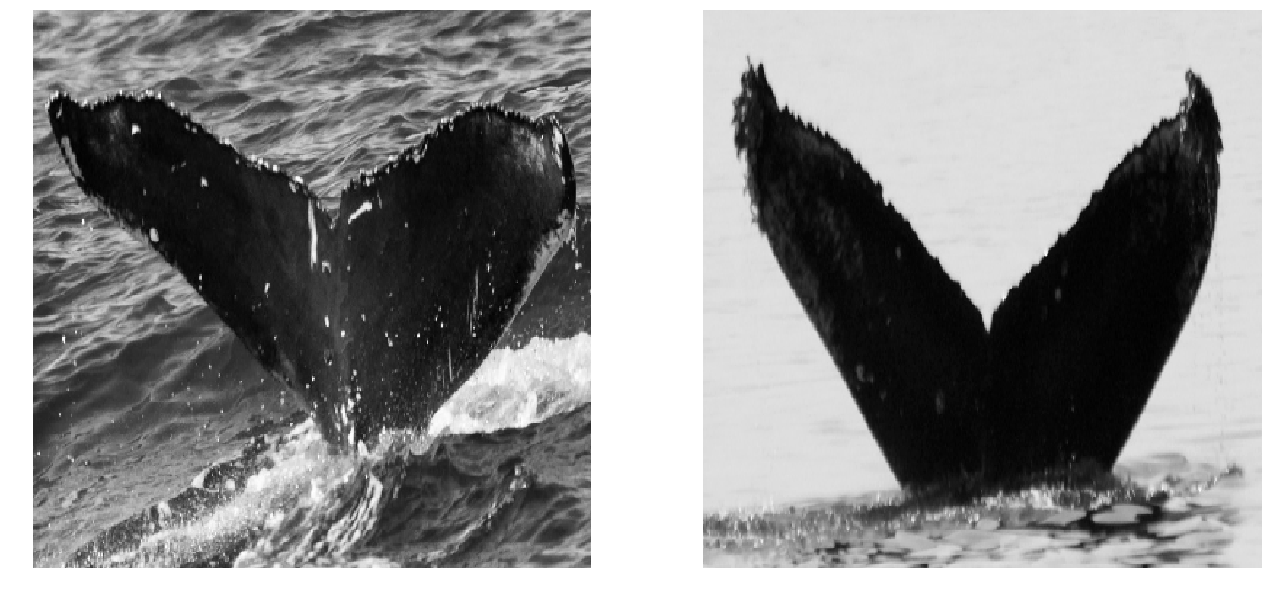

In [37]:
# second pair is for different whales
imgs = [array_to_img(a[1]), array_to_img(b[1])]
show_whales(imgs)

In [74]:
# A keras generator to evaluate only the BRANCH MODEL
class FeatureGen(Sequence):
    
    def __init__(self, data, batch_size=64, verbose=1):
        super(FeatureGen, self).__init__()
        self.data = data
        self.batch_size = batch_size
        self.verbose = verbose
        if self.verbose > 0:
            self.progress = tqdm_notebook(total=len(self), desc="Features")
        
    def __getitem__(self, index):
        start = self.batch_size * index
        size = min(len(self.data) - start, self.batch_size)
        a = np.zeros((size, ) + img_shape, dtype=K.floatx())
        for i in range(size):
            a[i,:,:,:] = read_raw_image(h2p[self.data[start + i]])
        if self.verbose > 0:
            self.progress.update()
            if self.progress.n >= len(self):
                self.progress.close()
        return a
    
    def __len__(self):
        return (len(self.data) + self.batch_size - 1) // self.batch_size
    
# A keras generator to evaluate on the HEAD MODEL on features already pre-computed.
# It computes only  the upper triangular matrix of the cost matrix if y is None
class ScoreGen(Sequence):
    
    def __init__(self, x, y=None, batch_size=2048, verbose=1):
        super(ScoreGen, self).__init__()
        self.x = x
        self.y = y
        self.batch_size = batch_size
        self.verbose = verbose
        if y is None:
            self.y = self.x
            self.ix, self.iy = np.triu_indices(x.shape[0], 1)
        else:
            self.iy, self.ix = np.indices((y.shape[0], x.shape[0]))
            self.ix = self.ix.reshape((self.ix.size))
            self.iy = self.iy.reshape((self.iy.size))
        self.subbatch = (len(self.x) + self.batch_size - 1) // self.batch_size
        if self.verbose > 0:
            self.progress = tqdm_notebook(total=len(self), desc='Scores')
            
    def __getitem__(self, index):
        start = index * self.batch_size
        end = min(start + self.batch_size, len(self.ix))
        a = self.y[self.iy[start:end], :]
        b = self.x[self.ix[start:end], :]
        if self.verbose > 0:
            self.progress.update()
            if self.progress.n >= len(self):
                self.progress.close()
        return [a, b]
    
    def __len__(self):
        return (len(self.ix) + self.batch_size - 1) // self.batch_size
        

In [75]:
from keras_tqdm import TQDMNotebookCallback

def set_lr(model, lr):
    K.set_value(model.optimizer.lr, float(lr))
    
def get_lr(model):
    return K.get_value(model.optimizer.lr)

def score_reshape(score, x, y=None):
    """
    Tranformed the packed matrix 'score' into a square matrix.
    @param score the packed matrix
    @param x the first image feature tensor
    @param y the second image feature tensor if different from x
    @result the square matrix
    """
    if y is None:
        # When y is None score is a packed upper triangular matrix.
        # Unpack and transpose  to form the symmetrical lower triangular matrix.
        m = np.zeros((x.shape[0], x.shape[0]), dtype=K.floatx())
        m[np.triu_indices(x.shape[0], 1)] = score.squeeze()
        m += m.transpose()
    else:
        m = np.zeros((y.shape[0], x.shape[0]), dtype=K.floatx())
        iy, ix = np.indices((y.shape[0], x.shape[0]))
        ix = ix.reshape((ix.size))
        iy = iy.reshape((iy.size))
        m[iy, ix] = score.squeeze()
    return m

def compute_score(verbose=1):
    """
    Compute the score matrix by scoring every image from the training set against every other image O(n^2)
    """
    features = branch_model.predict_generator(FeatureGen(train, verbose=verbose), max_queue_size=12, workers=1, verbose=0)
    score = head_model.predict_generator(ScoreGen(features, verbose=verbose), max_queue_size=12, workers=1, verbose=0)
    score = score_reshape(score, features)
    return features, score

def make_steps(step, ampl):
    """
    Perform training epochs
    @param step: number of epochs to perform
    @param ampl: K, the randomized component of the score matrix
    """
    global w2ts, t2i, steps, features, score, histories
    
    # shuffle training images
    random.shuffle(train)
    
    # Map whale id to the list of assosiated training image hash value
    for w, hs in w2hs.items():
        for h in hs:
            if h in train_set:
                if w not in w2ts:
                    w2ts[w] = []
                if h not in w2ts[w]:
                    w2ts[w] = w2ts[w].append(h)
    
    for w, ts in w2ts.items():
        w2ts[w] = np.array(ts)
        
    # Map training image hash value to index n in 'train' array
    t2i = {}
    for i, t in enumerate(train):
        t2i[t] = i
        
    # Compute the match score for each image pair
    features, score = compute_score()
    
    # Train the model for 'step' epochs
    history = model.fit_generator(
        TrainingData(score + ampl * np.random.random_sample(size=score.shape), steps=step, batch_size=32),
        initial_epoch=steps, epochs=steps + step, max_queue_size=12, workers=1, verbose=0,
        callbacks=[
            TQDMNotebookCallback(leave_inner=True, metric_format='{value:0.3f}')
        ]).history
    steps += step
    
    #Collect history data
    history['epochs'] = steps
    history['ms'] = np.mean(score)
    history['lr'] = get_lr(model)
    print(history['epochs'], history['lr'], history['ms'])
    histories.append(history)

In [76]:
mpiotte_standard_model = 'C:/Users/Maks/kaggle-competitions/Humpback-Whale-Identification/data/models/mpiotte-standard.model'
if isfile(mpiotte_standard_model):
    tmp = keras.models.load_model(mpiotte_standard_model)
    model.set_weights(tmp.get_weights)
else:
    # epoch 0-10
    make_steps(10, 1000)
    ampl = 100.0
    for _ in range(10):
        print('noise ampl = ', ampl)
        make_steps(5, ampl)
        ampl = max(1.0, 100**-0.1 * ampl)
    for _ in range(18): 
        make_steps(5, 1.0)
    # epoch -> 200
    set_lr(model, 16e-5)
    for _ in range(10): 
        make_steps(5, 0.5)
    # epoch -> 240
    set_lr(model, 4e-5)
    for _ in range(8): 
        make_steps(5, 0.25)
    # epoch -> 250
    set_lr(model, 1e-5)
    for _ in range(2): 
        make_steps(5, 0.25)
    # epoch -> 300
    weights = model.get_weights()
    model, branch_model, head_model = build_model(64e-5,0.0002)
    model.set_weights(weights)
    for _ in range(10): 
        make_steps(5, 1.0)
    # epoch -> 350
    set_lr(model, 16e-5)
    for _ in range(10): 
        make_steps(5, 0.5)    
    # epoch -> 390
    set_lr(model, 4e-5)
    for _ in range(8): 
        make_steps(5, 0.25)
    # epoch -> 400
    set_lr(model, 1e-5)
    for _ in range(2): 
        make_steps(5, 0.25)
        
    model.save('mpiotte-standard.model')

KeyboardInterrupt: 

In [ ]:
import gzip

def prepare_submission(threshold, filename):
    """
    Generate kaggle submission file.
    @param threshold: threshold given to 'new_whale'
    @param filname: submission file name
    """
    
    vtop = 0
    vhigh = 0
    pos = [0,0,0,0,0,0]
    with gzip.open(filename, 'wt', newline='\n') as f:
        f.write('Image,Id\n')
        for i, p in enumerate(tqdm_notebook(submit)):
            t = []
            s = set()
            a = score[i,:]
            for j in list(reversed(np.argsort(a))):
                h = known[j]
                if a[j] < threshold and new_whale not in s:
                    pos[len(t)] += 1
                    s.add(new_whale)
                    t.append(new_whale)
                    if len(t) == 5:
                        break
                for w in h2ws[h]:
                    assert w != new_whale
                    if w not in s:
                        if a[j] > 1.0:
                            vtop += 1
                        elif a[j] >= threshold:
                            vhigh += 1
                        s.add(w)
                        t.append(w)
                        if len(t) == 5:
                            break
                if len(t) == 5:
                    break
            if new_whale not in s:
                pos[5] += 1
            assert len(t) == 5 and len(s) == 5
            f.write(p + ',' + ' '.join(t[:5]) + '\n')
    return vtop, vhigh, pos

if True:
    # Find elements from training set not 'new_whale'
    h2ws = {}
    for p,w in tagged.items():
        if w != new_whale:
            h = p2h[p]
            if h not in h2ws:
                h2ws[p] = []
            if w not in h2ws[h]:
                h2ws[h] = h2ws[h].append(w)
    known = sorted(list(h2ws.keys()))
    
    # Dictionary of image indices
    h2i = {}
    for i,h in enumerate(known):
        h2i[h] = i
    
    # Evaluate the model
    fknown = branch_model.predict_generator(FeatureGen(known), max_queue_size=20, workers=10, verbose=0)
    fsubmit = branch_model.predict_generator(FeatureGen(submit), max_queue_size=20, workers=10, verbose=0)
    score = head_model.predict_generator(ScoreGen(fknown, submit), max_queue_size=20, workers=10, verbose=0)
    score = score_reshape(score, fknown, submit)
    
    # Generate the submission file 
    prepare_submission(0.99, 'mpiotte-standard.csv.zip')